In [5]:
!pip install colorama

In [6]:
#Ground water level prediction based on pre and post monsoon data
from google.colab import files
import os
import openpyxl
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

from tabulate import tabulate
from colorama import Fore, Style

In [7]:
dataFile = '/content/water level data.xlsx'
# check if the file exists
if not os.path.isfile(dataFile):
  # if the file does not exist, upload it
  uploaded = files.upload()
else:
  # if the file exists, do not upload it
  uploaded = {}

# read the data for each sheet into a dictionary of data frames
sheet_names = ['pre monsoon', 'post monsoon']
dfs = {}
for sheet_name in sheet_names:
  df = pd.read_excel(dataFile, sheet_name=sheet_name, engine='openpyxl', header=None, skiprows=1)
  start_row = df.index[0] + 1
  end_row = df.index[-1] + 1
  sheet_df = pd.read_excel(dataFile, sheet_name=sheet_name, engine='openpyxl', header=1, skiprows=range(1, start_row), nrows=end_row - start_row)
  dfs[sheet_name] = {'data': sheet_df, 'locations': sheet_df['Location'].unique()}

Saving water level data.xlsx to water level data.xlsx


In [8]:
def create_lstm_model(X, y):
  # define the LSTM model architecture for X
  model = Sequential()
  model.add(LSTM(50, activation="relu", input_shape=(X.shape[1], X.shape[2])))
  model.add(Dense(y.shape[1]))
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  #print the model metrics "accuracy" if it exists
  #if hasattr(model, "accuracy"):

    #print( f"Model accuracy: {model.accuracy}")

  return model



In [9]:
def prepare_data(location, df_dict, min_samples=10):
  # get pre-monsoon and post-monsoon data for the given location
  dfs = df_dict.values()
  df1 = None
  df2 = None
  locations = []
  for df in dfs:
      locations += list(df['data']['Location'].unique())
      #print(locations)
  locations = list(set(locations))
  #print(locations)
  for df in dfs:
      if location in df['data']['Location'].unique():
          # print(location)
          if df1 is None:
              df1 = df['data'][df['data']['Location'] == location]
            #  print(df1)
          else:
              df2 = df['data'][df['data']['Location'] == location]
  # check if there are enough samples for the location
  if df1 is None or df2 is None or df1.shape[0] < min_samples or df2.shape[0] < min_samples:
      print(f"Not enough samples for {location}, skipping...")
      return None
  # split the data into features (X) and target (y)
  X1 = df1.drop(['District', 'Location', 'Well Type'], axis=1).values
  #print(X1)
  y1 = df1.iloc[:, 2:-1].values
  #print(y1)
  X2 = df2.drop(['District', 'Location', 'Well Type'], axis=1).values
  y2 = df2.iloc[:, 2:-1].values
  # reshape the data for LSTM input
  X1 = X1.reshape((X1.shape[0], 1, X1.shape[1]))
  X2 = X2.reshape((X2.shape[0], 1, X2.shape[1]))
  return X1, y1, X2, y2

In [10]:
def plot_graphs(y, y_pred, season, location):
  plt.figure(figsize=(18, 6))
  plt.plot(y, label = "Actual", marker="o")
  plt.plot(y_pred, label = "Predicted", marker = "*")
  plt.xlabel("sequence length")
  plt.ylabel("Actual and Predicted values")
  plt.title('Actual and predicted plot of {} at {}'.format(season, location))
  plt.legend()
  plt.savefig('{}_{}.png'.format(location, season))
  plt.show()

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 - 2s - 2s/step - accuracy: 0.0000e+00 - loss: 40.9660
Epoch 2/100
1/1 - 0s - 117ms/step - accuracy: 0.0000e+00 - loss: 40.3595
Epoch 3/100
1/1 - 0s - 43ms/step - accuracy: 0.0000e+00 - loss: 39.7642
Epoch 4/100
1/1 - 0s - 46ms/step - accuracy: 0.0000e+00 - loss: 39.1779
Epoch 5/100
1/1 - 0s - 43ms/step - accuracy: 0.0000e+00 - loss: 38.6035
Epoch 6/100
1/1 - 0s - 45ms/step - accuracy: 0.0000e+00 - loss: 38.0467
Epoch 7/100
1/1 - 0s - 45ms/step - accuracy: 0.0000e+00 - loss: 37.4864
Epoch 8/100
1/1 - 0s - 46ms/step - accuracy: 0.0000e+00 - loss: 36.9213
Epoch 9/100
1/1 - 0s - 44ms/step - accuracy: 0.0000e+00 - loss: 36.3503
Epoch 10/100
1/1 - 0s - 43ms/step - accuracy: 0.0000e+00 - loss: 35.7726
Epoch 11/100
1/1 - 0s - 43ms/step - accuracy: 0.0000e+00 - loss: 35.1873
Epoch 12/100
1/1 - 0s - 43ms/step - accuracy: 0.0000e+00 - loss: 34.5939
Epoch 13/100
1/1 - 0s - 43ms/step - accuracy: 0.0000e+00 - loss: 33.9920
Epoch 14/100
1/1 - 0s - 57ms/step - accuracy: 0.0000e+00 - loss: 33.3812


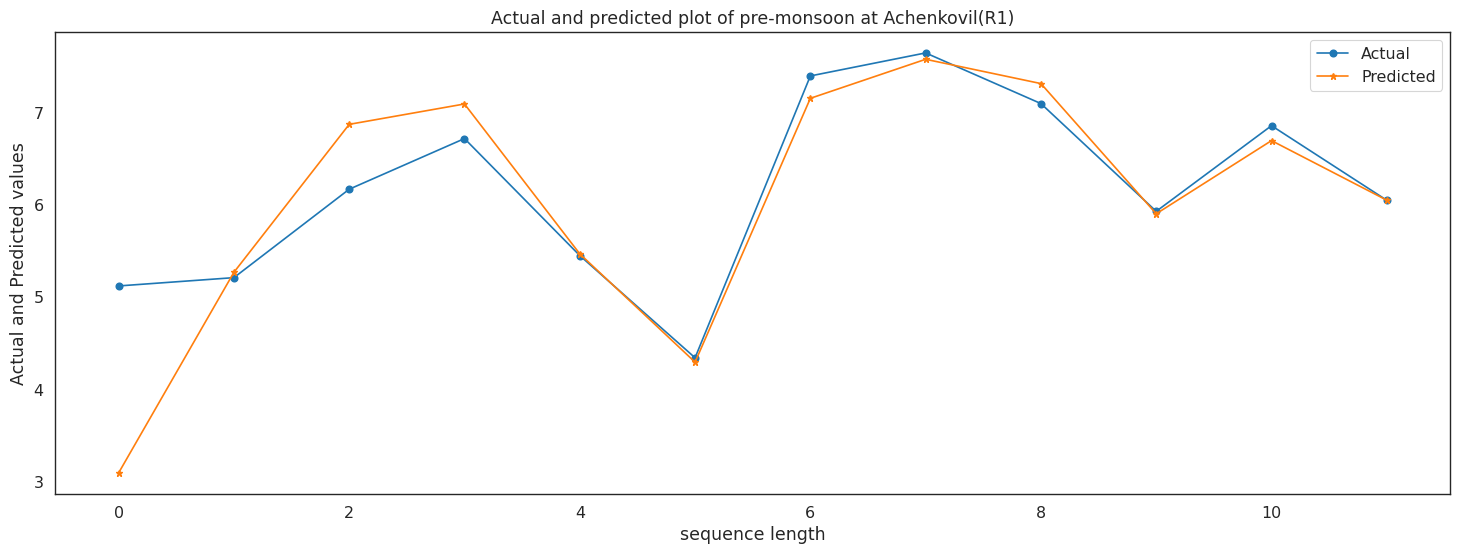

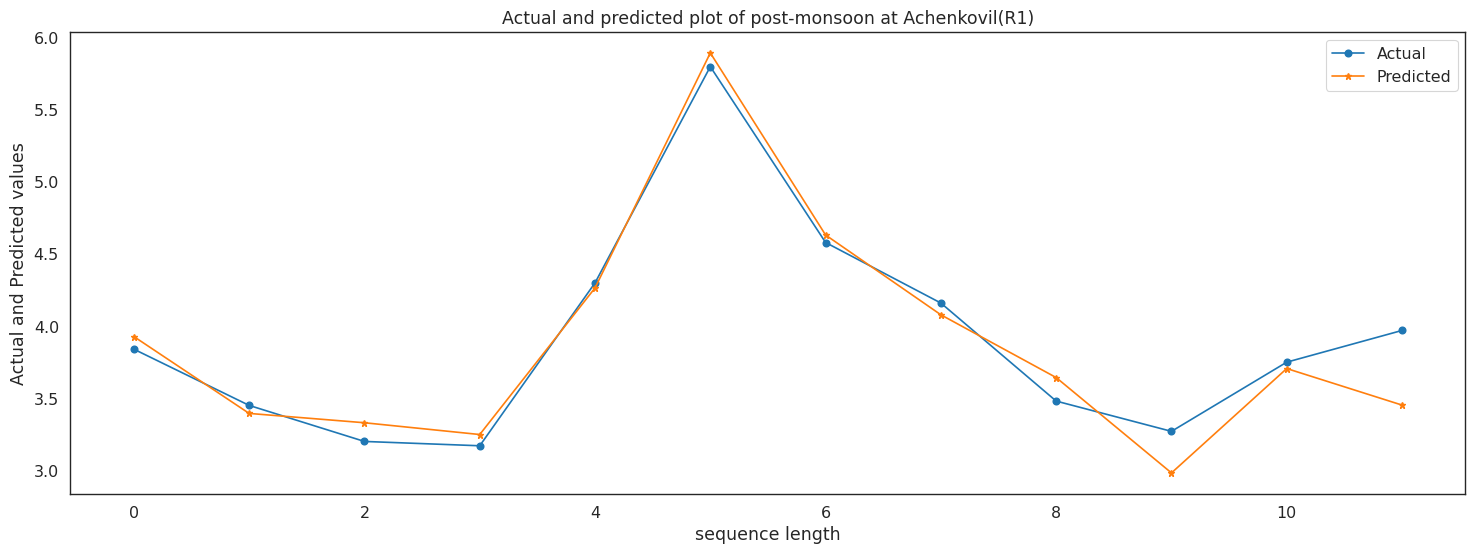

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 - 2s - 2s/step - accuracy: 0.0000e+00 - loss: 6.8326
Epoch 2/100
1/1 - 0s - 47ms/step - accuracy: 0.0000e+00 - loss: 6.7640
Epoch 3/100
1/1 - 0s - 48ms/step - accuracy: 0.0000e+00 - loss: 6.6952
Epoch 4/100
1/1 - 0s - 45ms/step - accuracy: 0.0000e+00 - loss: 6.6258
Epoch 5/100
1/1 - 0s - 48ms/step - accuracy: 0.0000e+00 - loss: 6.5558
Epoch 6/100
1/1 - 0s - 48ms/step - accuracy: 0.0000e+00 - loss: 6.4857
Epoch 7/100
1/1 - 0s - 61ms/step - accuracy: 0.0000e+00 - loss: 6.4152
Epoch 8/100
1/1 - 0s - 47ms/step - accuracy: 0.0000e+00 - loss: 6.3439
Epoch 9/100
1/1 - 0s - 50ms/step - accuracy: 0.0000e+00 - loss: 6.2707
Epoch 10/100
1/1 - 0s - 50ms/step - accuracy: 0.0000e+00 - loss: 6.1953
Epoch 11/100
1/1 - 0s - 48ms/step - accuracy: 0.0000e+00 - loss: 6.1176
Epoch 12/100
1/1 - 0s - 52ms/step - accuracy: 0.0000e+00 - loss: 6.0373
Epoch 13/100
1/1 - 0s - 47ms/step - accuracy: 0.0000e+00 - loss: 5.9543
Epoch 14/100
1/1 - 0s - 48ms/step - accuracy: 0.0000e+00 - loss: 5.8684
Epoch 15/100
1/

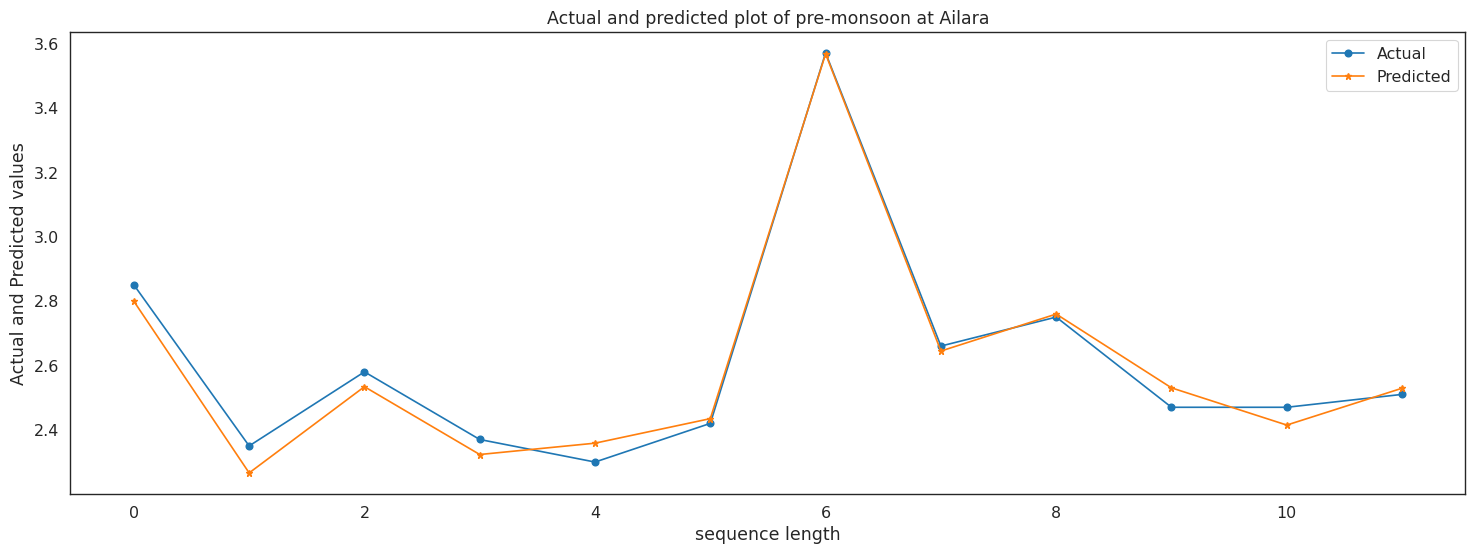

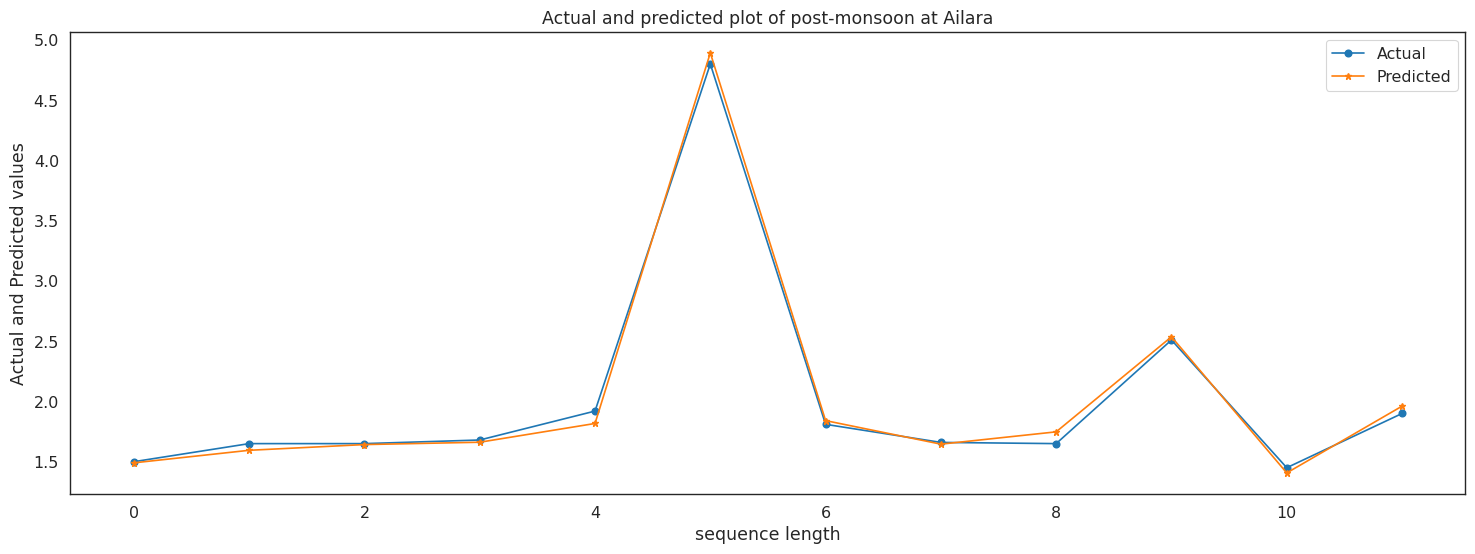

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 - 2s - 2s/step - accuracy: 0.0000e+00 - loss: 103.1832
Epoch 2/100
1/1 - 0s - 50ms/step - accuracy: 0.0000e+00 - loss: 101.4097
Epoch 3/100
1/1 - 0s - 47ms/step - accuracy: 0.0000e+00 - loss: 99.7121
Epoch 4/100
1/1 - 0s - 51ms/step - accuracy: 0.0000e+00 - loss: 98.0776
Epoch 5/100
1/1 - 0s - 56ms/step - accuracy: 0.0000e+00 - loss: 96.4923
Epoch 6/100
1/1 - 0s - 56ms/step - accuracy: 0.0000e+00 - loss: 94.9483
Epoch 7/100
1/1 - 0s - 57ms/step - accuracy: 0.0000e+00 - loss: 93.4251
Epoch 8/100
1/1 - 0s - 49ms/step - accuracy: 0.0000e+00 - loss: 91.9089
Epoch 9/100
1/1 - 0s - 48ms/step - accuracy: 0.0000e+00 - loss: 90.3895
Epoch 10/100
1/1 - 0s - 47ms/step - accuracy: 0.0000e+00 - loss: 88.8556
Epoch 11/100
1/1 - 0s - 67ms/step - accuracy: 0.0000e+00 - loss: 87.2987
Epoch 12/100
1/1 - 0s - 134ms/step - accuracy: 0.0000e+00 - loss: 85.7107
Epoch 13/100
1/1 - 0s - 68ms/step - accuracy: 0.0000e+00 - loss: 84.0845
Epoch 14/100
1/1 - 0s - 65ms/step - accuracy: 0.0000e+00 - loss: 82.413

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Mean squared error for Akkal (pre-monsoon): 0.017607672128070743
Epoch 1/100
1/1 - 2s - 2s/step - accuracy: 0.0000e+00 - loss: 89.9786
Epoch 2/100
1/1 - 0s - 50ms/step - accuracy: 0.0000e+00 - loss: 88.4140
Epoch 3/100
1/1 - 0s - 49ms/step - accuracy: 0.0000e+00 - loss: 86.7856
Epoch 4/100
1/1 - 0s - 50ms/step - accuracy: 0.0000e+00 - loss: 85.0900
Epoch 5/100
1/1 - 0s - 51ms/step - accuracy: 0.0000e+00 - loss: 83.3242
Epoch 6/100
1/1 - 0s - 50ms/step - accuracy: 0.0000e+00 - loss: 81.4858
Epoch 7/100
1/1 - 0s - 55ms/step - accuracy: 0.0000e+00 - loss: 79.5730
Epoch 8/100
1/1 - 0s - 54ms/step - accuracy: 0.0000e+00 - loss: 77.5869
Epoch 9/100
1/1 - 0s - 49ms/step - accuracy: 0.0000e+00 - loss: 75.5548
Epoch 10/100
1/1 - 0s - 50ms/step - accuracy: 0.0000e+00 - loss: 73.4458
Epoch 11/100
1/1 - 0s - 55ms/step - accuracy: 0.0000e+00 - loss: 71.2594
Epoch 12/100
1/1 - 0s - 53ms/step - accuracy: 0.0000e+00 - loss: 69.0001
Epoch 13/100
1/1 - 0s - 49ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Mean squared error for Akkal (pre-monsoon): 0.005725600531398158
Mean squared error for Akkal (post-monsoon): 0.005725600531398158


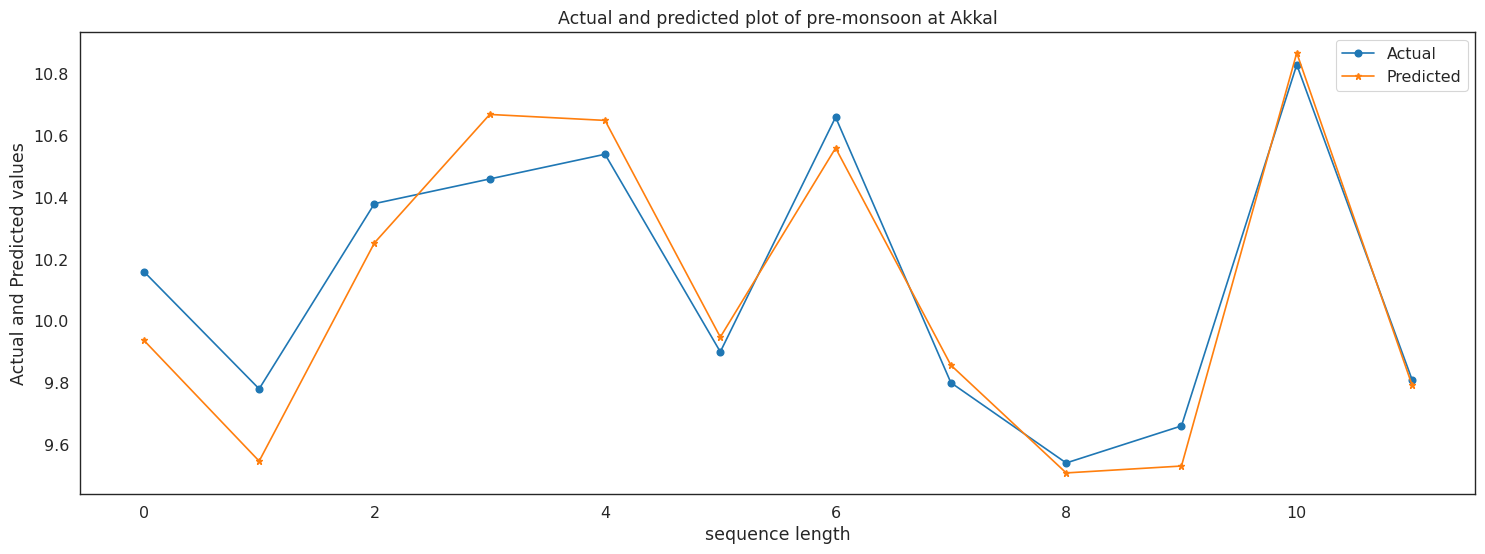

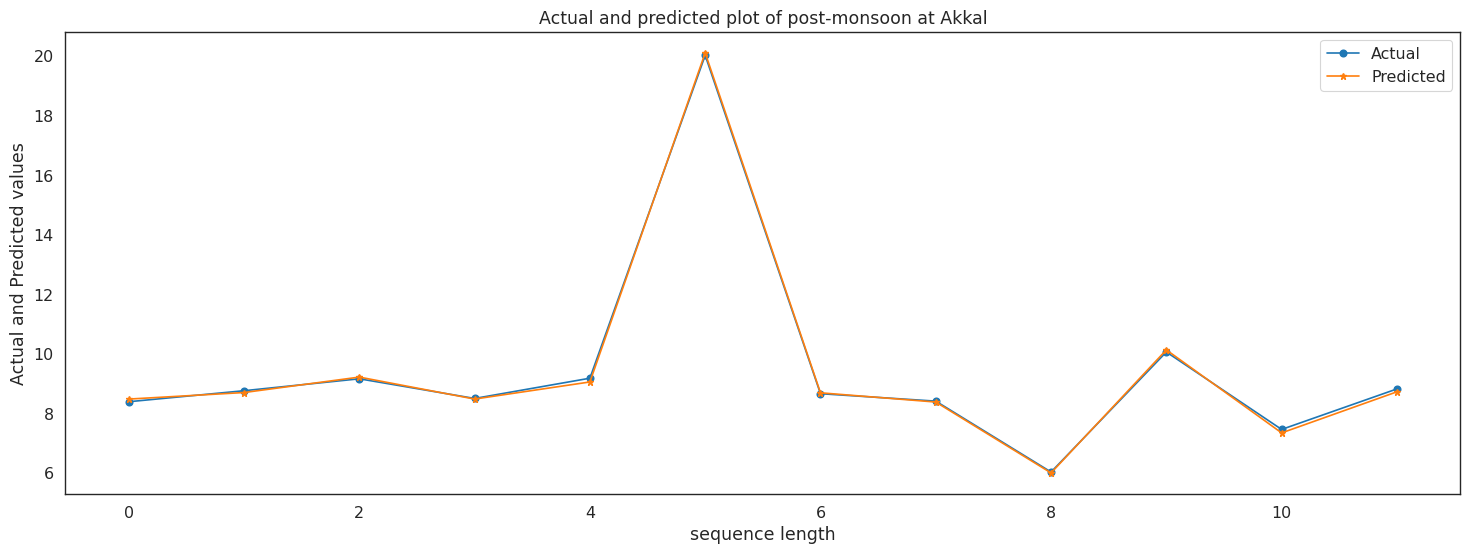

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 - 2s - 2s/step - accuracy: 0.0000e+00 - loss: 80.1855
Epoch 2/100
1/1 - 0s - 53ms/step - accuracy: 0.0000e+00 - loss: 78.6124
Epoch 3/100
1/1 - 0s - 51ms/step - accuracy: 0.0000e+00 - loss: 77.1319
Epoch 4/100
1/1 - 0s - 53ms/step - accuracy: 0.0000e+00 - loss: 75.7234
Epoch 5/100
1/1 - 0s - 53ms/step - accuracy: 0.0000e+00 - loss: 74.4498
Epoch 6/100
1/1 - 0s - 59ms/step - accuracy: 0.0000e+00 - loss: 73.2249
Epoch 7/100
1/1 - 0s - 58ms/step - accuracy: 0.0000e+00 - loss: 72.0348
Epoch 8/100
1/1 - 0s - 55ms/step - accuracy: 0.0000e+00 - loss: 70.8751
Epoch 9/100
1/1 - 0s - 52ms/step - accuracy: 0.0000e+00 - loss: 69.7398
Epoch 10/100
1/1 - 0s - 53ms/step - accuracy: 0.0000e+00 - loss: 68.6187
Epoch 11/100
1/1 - 0s - 55ms/step - accuracy: 0.0000e+00 - loss: 67.5096
Epoch 12/100
1/1 - 0s - 56ms/step - accuracy: 0.0000e+00 - loss: 66.3978
Epoch 13/100
1/1 - 0s - 56ms/step - accuracy: 0.0000e+00 - loss: 65.2768
Epoch 14/100
1/1 - 0s - 58ms/step - accuracy: 0.0000e+00 - loss: 64.1405
E

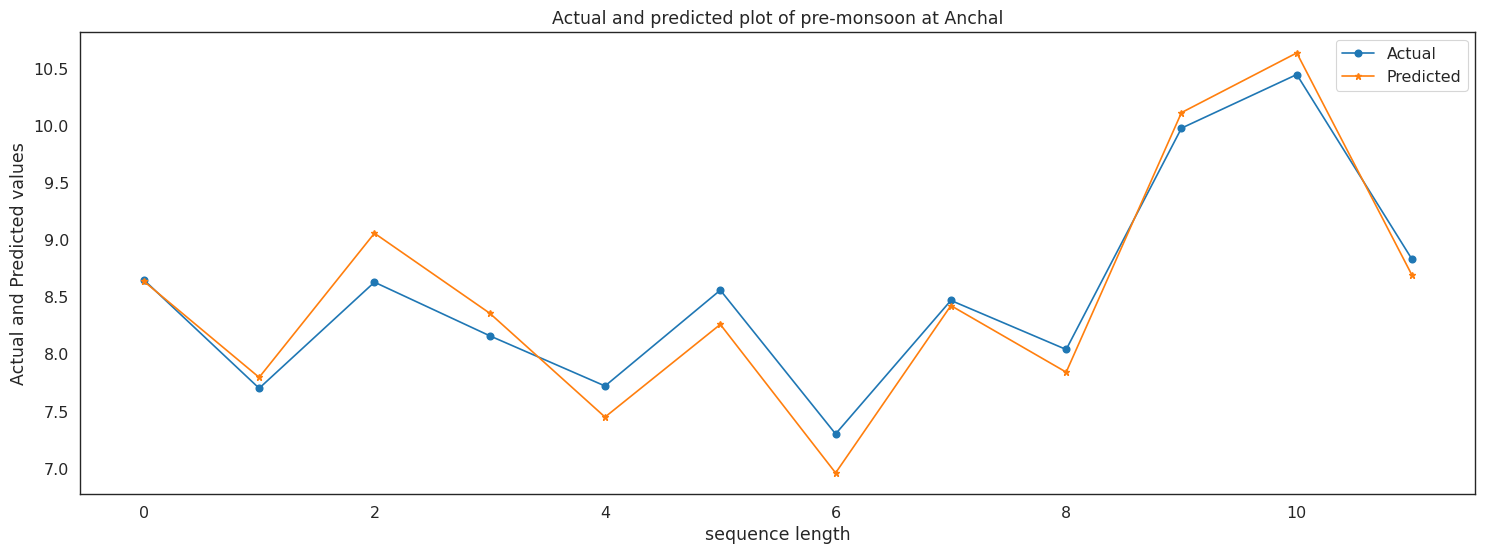

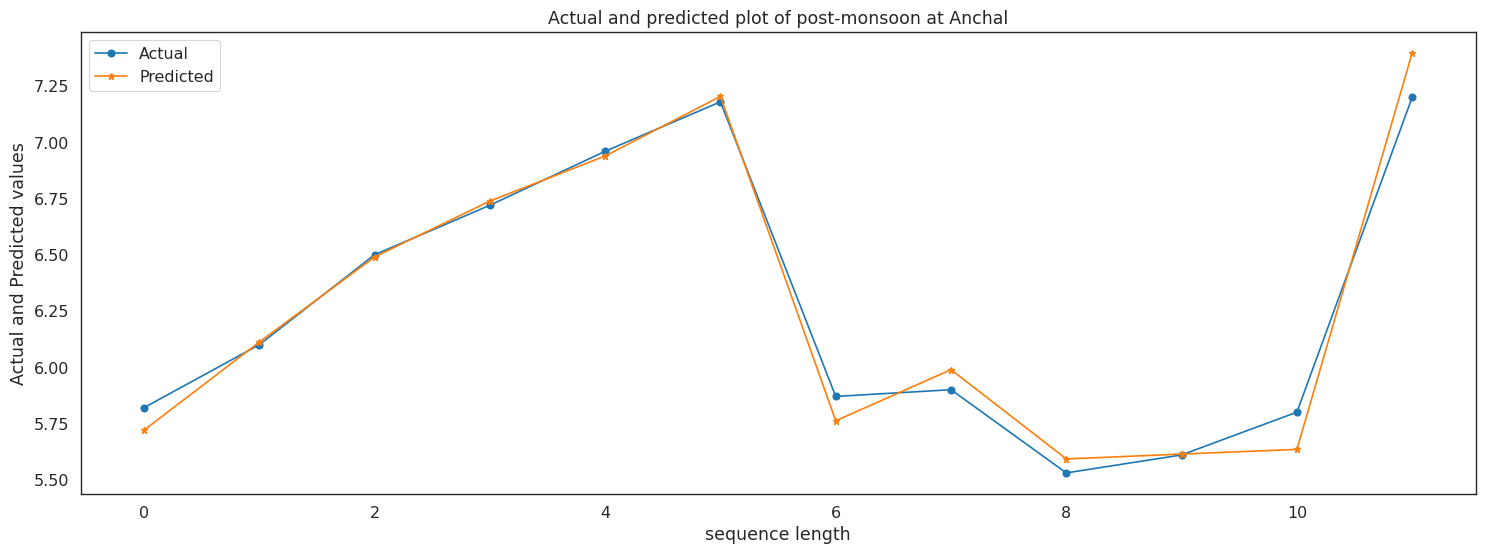

Location          Predicted water level for pre-Monsoon    Predicted water level for post-Monsoon    MSE for pre-Monsoon    MSE for post-Monsoon        Loss
--------------  ---------------------------------------  ----------------------------------------  ---------------------  ----------------------  ----------
Achenkovil(R1)                                  6.06634                                   3.87941              0.408527               0.0360952   0.444622
Ailara                                          2.59677                                   2.01962              0.0020789              0.00329307  0.00537196
Akkal                                          10.0932                                    9.44147              0.0176077              0.0057256   0.0233333
Anchal                                          8.51898                                   6.26602              0.0524264              0.00845903  0.0608854


In [11]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def get_lstm_predictions(location,df_dict, min_samples=10):
  X1, y1, X2, y2 = prepare_data(location,df_dict, min_samples)
  #print(X1)
  # define the LSTM model architecture for X1
  model_1 = create_lstm_model(X1, y1)

  # fit the model to the pre-monsoon data
  model_1.fit(X1, y1, epochs=100, batch_size=32, verbose=2)

  # make predictions on the pre-monsoon data
  y1_pred = model_1.predict(X1)


  # evaluate the model's performance on the pre-monsoon data
  mse1 = np.mean((y1_pred - y1)**2)

  print(f"Mean squared error for {location} (pre-monsoon): {mse1}")


  # define the LSTM model architecture for X2
  model_2 = create_lstm_model(X2, y2)

  # fit the model to the pre-monsoon data
  model_2.fit(X2, y2, epochs=100, batch_size=32, verbose=2)

  # make predictions on the pre-monsoon data
  y2_pred = model_2.predict(X2)

  # evaluate the model's performance on the post-monsoon data
  mse2 = np.mean((y2_pred - y2)**2)
  print(f"Mean squared error for {location} (pre-monsoon): {mse2}")

  # make predictions on the post-monsoon data
  #y2_pred = model.predict(X)
  # evaluate the model's performance on the post-monsoon data
  #mse2 = np.mean((y2_pred - y2)**2)
  print(f"Mean squared error for {location} (post-monsoon): {mse2}")
  # calculate the loss
  loss = mse1 + mse2

  # print the model summary
  #print(f"Model Summary: {model_1.summary()}")

  #plot the graph for pre-monsoon

  plot_graphs(y1[0], y1_pred[0], "pre-monsoon", location)
  plot_graphs(y2[0], y2_pred[0], "post-monsoon", location)


  #print the model metrics "accuracy" if it exists
  if hasattr(model_1, "accuracy"):
    print( f"Model accuracy: {model_1.accuracy}")

  # return the mean of the predictions for both seasons, the mse for both seasons, and the loss
  return np.mean(y1_pred), np.mean(y2_pred), mse1, mse2, loss


# create an empty list to store the table data
table_data = []

# loop over each unique location and call get_lstm_predictions function
locations = dfs[sheet_name]['data']['Location'].unique()
df_dict = {'pre': dfs['pre monsoon'], 'post': dfs['post monsoon']}
for location in locations:
    res = get_lstm_predictions(location, df_dict, min_samples=1)
    if res is None:
        continue
    y1_pred, y2_pred, mse1, mse2, loss = res

    # append the location and predicted water levels to the table data
    table_data.append([location, y1_pred.flatten()[0], y2_pred.flatten()[0], mse1, mse2, loss])

# sort the table data by pre-monsoon predictions in descending order
#table_data.sort(key=lambda x: x[1], reverse=True)

# add color to the column headers
table_headers = [Fore.GREEN + 'Location' + Style.RESET_ALL,
                 Fore.BLUE + 'Predicted water level for pre-Monsoon' + Style.RESET_ALL,
                 Fore.BLUE + 'Predicted water level for post-Monsoon' + Style.RESET_ALL,
                 Fore.RED + 'MSE for pre-Monsoon' + Style.RESET_ALL,
                 Fore.RED + 'MSE for post-Monsoon' + Style.RESET_ALL,
                 Fore.RED + 'Loss' + Style.RESET_ALL]

# add color to the table rows based on the predicted water level
#for i, row in enumerate(table_data):
    #if row[1] > row[2]:
        #table_data[i] = [Fore.RED + str(val) + Style.RESET_ALL if isinstance(val, float) and val > 0.5 else val for val in row]
    #elif row[2] > row[1]:
       # table_data[i] = [Fore.GREEN + str(val) + Style.RESET_ALL if isinstance(val, float) and val > 0.5 else val for val in row]

# create the table using the tabulate library
table = tabulate(table_data, headers=table_headers)

# print the table
print(table)



In [13]:
!pip -q install tabulate
import pandas as pd

# Create a DataFrame from your table_data
df_results = pd.DataFrame(
    table_data,
    columns=[
        "Location",
        "Predicted water level for pre-Monsoon",
        "Predicted water level for post-Monsoon",
        "MSE for pre-Monsoon",
        "MSE for post-Monsoon",
        "Loss"
    ]
)

print("\n\n✅ Markdown table (copy-paste into GitHub README):\n")
print(df_results.to_markdown(index=False))

# Optional: save as CSV for backup
df_results.to_csv("performance_table.csv", index=False)
print("\nSaved file: performance_table.csv")
df_results.to_csv("performance_table.csv", index=False)






✅ Markdown table (copy-paste into GitHub README):

| Location       |   Predicted water level for pre-Monsoon |   Predicted water level for post-Monsoon |   MSE for pre-Monsoon |   MSE for post-Monsoon |       Loss |
|:---------------|----------------------------------------:|-----------------------------------------:|----------------------:|-----------------------:|-----------:|
| Achenkovil(R1) |                                 6.06634 |                                  3.87941 |             0.408527  |             0.0360952  | 0.444622   |
| Ailara         |                                 2.59677 |                                  2.01962 |             0.0020789 |             0.00329307 | 0.00537196 |
| Akkal          |                                10.0932  |                                  9.44147 |             0.0176077 |             0.0057256  | 0.0233333  |
| Anchal         |                                 8.51898 |                                  6.26602 |             0